# Intro to Machine Learning: Assignment 3

## Requirements
This assignment calls for using principal component analysis and histogram/Bayesian concepts for classifier design and evaluation. Use the attached Excel spreadsheet Assignment_3_ Submission_Template.xlsxPreview the documentView in a new window as a template to report your results (an .ods version is available as well). Except for cutting and pasting your results, do not alter the spreadsheet in any other way. This is the only recognized means of submitting this assignment. An extra sheet has been provided just in case you wish to make [optional] interesting observations.<br/><br/>

Read through the instructions and examine the spreadsheet carefully and understand what must be computed or described. Enjoy the transition from "I have been exposed to machine learning" to "I am becoming quite good at machine learning!"<br/><br/>

1. Import handwritten digit data from yann.lecun.com/exdb/mnist (four files). You only need the training data for this assignment. Refer to the Python code suggested in Read_MNIST.htmlView in a new window to read and parse the data.
2. Prepare the data you will use for this assignment by limiting the imported data to two specific digits. The exact two digits that you will use for the rest of the assignment is given in a table following these instructions. The positive and negative class labels have also been identified for you.
3. Prepare your X matrix and target vector T
4. Go through the XZCVP procedure to produce P which is the 2D approximation to X. The mean vector (mu) and two eigenvectors (v1, v2) calculated in completing this step must also be entered into the Excel template attached. You will also need to pastea picture of the 2D scatterplot showing the two classes.
5. Optional: Write a program, call a builtin function or use the “manual” procedure explained in class to convert any given 784 element feature vector in X to an image. No submission is required.
6. Optional: Visually verify that the corresponding element of P, when projected back to 784 dimensions and visualized as an image still looks like the original image. That is, visually verify that reduction in dimension does not significantly compromise the identity of the samples. No submission is required.
7. Build a histogram classifier and a Bayesian classifier (both 2D) assuming that the feature vectors are distributed normally in the reduced dimensional space. Note: All the specifications needed to apply the classifiers must be entered into the Excel template attached. For the histogram classifier, the specifications include the ranges (min, max) covered by the two features, number of bins (fixed for you at 25x25), and the histogram counts. For the Bayesian classifier, the specifications include the number of samples in the two classes, the mean vectors and covariance matrices. In order to use either classifier on a 784D query, the mean vectors and eigenvectors (Step 4 above) are needed.
8. Exhibit any one representative positive feature vector xp and the corresponding mean-subtracted vector (zp), 2D representation (pp), reconstructed mean-subtracted vector (rp), and reconstructed mean-adjusted vector (xrecp). Do the same for any one representative negative feature vector xn.
9. Run xp and xn through both the classifiers and record the results (e.g. what is xp recognized as? With what probability? See the Excel sheet to understand how to report the results.)
10. Evaluate the training accuracy of your two classifiers (2D histogram and Bayesian) and record the results.<br/><br/>

Note: The helpful document PCA_Simple_Example.htmlView in a new window has been provided for guidance in implementing the XZCVPR process. Also see the slide titled "How do I ace Assignment 3?"

## Read MINST

In [1]:
import os, struct
import matplotlib as plt
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros as np

def load_mnist(dataset="training", digits=range(10), path='/intro2mlearning-assignments/DataFiles/MNISTFiles'):
#     path = os.path.join(os.path.expanduser('~'), 'path1')
    """
    Adapted from: http://cvxopt.org/applications/svm/index.html?highlight=mnist
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

In [2]:
# os.path.curdir
# os.path.exists(os.path.curdir)
# os.path.exists(os.path.join('..', '/DataFiles/MNISTFiles'))
os.path.exists('../DataFiles/MNISTFiles/train-labels.idx1-ubyte')

True

In [3]:
from pylab import *
from numpy import *
import scipy.sparse as sparse
import scipy.linalg as linalg

images, labels = load_mnist('training', digits=[1,8], path='../DataFiles/MNISTFiles')
# converting from NX28X28 array into NX784 array
flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = np.asarray(flatimages)

## X

Check shape of matrix (12593, 784)
Check Mins and Max Values 0 255

Check training vector by plotting image 



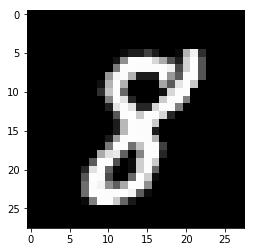

In [4]:
print("Check shape of matrix", X.shape)
print("Check Mins and Max Values",np.amin(X),np.amax(X))
print("\nCheck training vector by plotting image \n")
plt.imshow(X[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
# print(X[20])

In [5]:
XTranspose = X.transpose()
print("Check shape of transpose", XTranspose.shape)

Check shape of transpose (784, 12593)


## Z

In [6]:
mu=np.mean(X,axis = 0)
print("shape of mu should be number of bins (features in feature vector):", mu.shape)

shape of mu should be number of bins (features in feature vector): (784,)


In [7]:
Z=X-mu

## C

In [8]:
C=np.cov(Z,rowvar=False)

## V

In [9]:
import numpy.linalg as LA
[lambDa, V] = LA.eigh(C)
# print (V)
lambDa=np.flipud(lambDa)
V=np.flipud(V.transpose())
row=V[0,:]
# np.dot(C,row)/(lambDa[0] * row)
# print (V[0])

## P

In [10]:
P=np.dot(Z,V.transpose())

## R

In [11]:
R=np.dot(P,V)

## Xrec

In [12]:
Xrec = R + mu
print(Xrec - X)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## Dimension Reduction

(12593, 784)
hi [ -177.01262488 -1123.38369215]
(12593, 784)
(12593, 784)


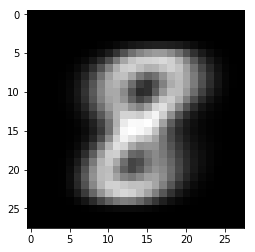

In [13]:
Xrec1=(np.dot(P[:,0:1],V[0:1,:]))+mu
# print(V[0:1,:])

print(Xrec1.shape)
Xrec2=(np.dot(P[:,0:2],V[0:2,:]))+mu
print("hi",P[:,0:2][0])
print(Xrec2.shape)
Xrec3=(np.dot(P[:,0:3],V[0:3,:]))+mu
print(Xrec3.shape)
Xrec784=(np.dot(P[:,0:784],V[0:784,:]))+mu
plt.imshow(Xrec1[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()

## Excel Writer

(12593,)


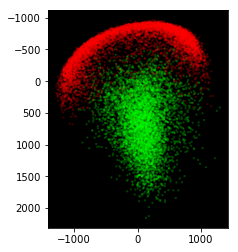

In [14]:
#Note that T contains class labels labeln and labelp (e.g. 5 & 6)
labeln = 1
labelp = 8
# print(labels)
print(labels[0:,0].shape)
T = labels[0:,0]
cols=zeros((alen(T),4));
cols[T==labeln]=[1,0,0,0.25];
cols[T==labelp]=[0,1,0,0.25];
randomorder=permutation(arange(alen(T))); 
#Don't worry about this stuff. Just makes a pretty picture
 
fig = figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(P[randomorder,1],P[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal');
gca().invert_yaxis();
show()

## 2D Histogram Classifier

In [15]:
Pc1List = P[:,0:1][:,0]
print(Pc1List)

Pc2List = P[:,1:2][:,0]
print(Pc2List)

Pc1Max = Pc1List.max()
Pc2Max = Pc2List.max()

Pc1Min = Pc1List.min()
Pc2Min = Pc2List.min()

def CalculateBin (FeatureValue, FeatureMax, FeatureMin, NumberOfBins):
    binindex = (np.round(((NumberOfBins-1)*(FeatureValue-FeatureMin)/
                          (FeatureMax-FeatureMin)))).astype('int32')
    return binindex

def build2DHistogramClassifier(bincount, pc1, pc2,
                               classlabels):
    pc1max = pc1.max()
    pc2max = pc2.max()
    pc1min = pc1.min()
    pc2min = pc2.min()
    
    print ("pc1 max: ", pc1max)
    print ("pc1 min: ", pc1min)
    print ("pc2 max: ", pc2max)
    print ("pc2 min: ", pc2min)


    HPosClass = np.zeros(shape=(bincount,bincount)).astype('int32')
    HNegClass = np.zeros(shape=(bincount,bincount)).astype('int32')
    
    for i, j, k in zip (pc1, pc2, classlabels) :
        
        row = CalculateBin(i, pc1max, pc1min, bincount)
        col = CalculateBin(j, pc2max, pc2min, bincount)
        if(k == 8):
            HPosClass[row][col] += 1
        else:
            HNegClass[row][col] += 1
            
    return HPosClass, HNegClass

# print ("harro",P)

[-177.01262488 -486.95502974 -701.57667656 ..., -414.414857    714.0689667
  360.63653596]
[-1123.38369215   953.72782595   722.54538116 ...,  -625.66148309
    72.30827959  -418.43557808]


In [16]:
HPosClassifier, HNegClassifier = build2DHistogramClassifier(25, Pc1List, Pc2List, T)
numPositiveSamples = list(T).count(8)
numNegativeSamples = list(T).count(1)
print ("Number of positive samples (8): ",numPositiveSamples)
print ("Number of negative samples (1): ",numNegativeSamples)
pc1positive = []
pc1negative = []
pc2positive = []
pc2negative = []
for i, j, k in zip (Pc1List, Pc2List, T) :
    if (k == 8):
        pc1positive.append(i)
        pc2positive.append(j)
    else:
        pc1negative.append(i)
        pc2negative.append(j)
meanPc1Positive = np.mean(pc1positive)
meanPc2Positive = np.mean(pc2positive)
meanPc1Negative = np.mean(pc1negative)
meanPc2Negative = np.mean(pc2negative)
print("Positive Class Mean Vector: ",meanPc1Positive,meanPc2Positive)
print("Negative Class Mean Vector: ",meanPc1Negative,meanPc2Negative)

positiveMeanVector = np.matrix([[meanPc1Positive, meanPc2Positive]])
negativeMeanVector = np.matrix([[meanPc1Negative, meanPc2Negative]])

print(positiveMeanVector)

pc1 max:  2154.40731732
pc1 min:  -960.146247242
pc2 max:  1295.79239611
pc2 min:  -1280.78283154
Number of positive samples (8):  5851
Number of negative samples (1):  6742
Positive Class Mean Vector:  640.724426973 87.5140451914
Negative Class Mean Vector:  -556.048445894 -75.9484838943
[[ 640.72442697   87.51404519]]


## Bayes

In [17]:
positiveCovariance = np.cov([pc1positive, pc2positive])
print (positiveCovariance)

[[ 196462.88819148   10925.12488228]
 [  10925.12488228   77543.27409883]]


In [18]:
negativeCovariance = np.cov([pc1negative, pc2negative])
print(negativeCovariance)

[[  89032.38349435 -100387.65188909]
 [-100387.65188909  475845.92943365]]


In [19]:
def calculateBayesianProbability(Cov1, Cov2, Query, Mean1, Mean2,
                                 Num1, Num2):
    x = Num1 * calculatePDF(Cov1, Query, Mean1)
    
    y = Num2 * calculatePDF(Cov2, Query, Mean2)
    
    
    probability = x / (x + y)
    return probability

def calculatePDF(Cov, Query, Mean) :
    return ((1/(2 * np.pi * np.sqrt(np.linalg.det(Cov)))) * 
            np.exp(-(1/2) *(np.subtract(Query, Mean)) * np.linalg.inv(Cov) * 
                  np.subtract(Query, Mean).transpose()))

## Testing

Check shape of matrix (12593, 784)
Check Mins and Max Values 0 255

Check training vector by plotting image 



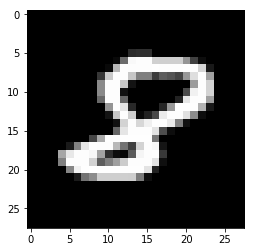

In [20]:
from pylab import *
from numpy import *
import scipy.sparse as sparse
import scipy.linalg as linalg

imagestest, labelstest = load_mnist('testing', digits=[1,8], path='../DataFiles/MNISTFiles')
flatimagestest = list()
for i in imagestest:
    flatimagestest.append(i.ravel())
Xtest = np.asarray(flatimagestest)
print("Check shape of matrix", X.shape)
print("Check Mins and Max Values",np.amin(X),np.amax(X))
print("\nCheck training vector by plotting image \n")

plt.imshow(Xtest[10].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()

In [21]:
def convertQuery (x, mu, v1, v2) :
    z = x - mu
    lala = np.matrix(np.array([v1, v2]))
    lala = lala.transpose()
    p = np.dot(z, lala)
    p1 = p[0, 0]
    p2 = p[0, 1]
    return p1, p2, z

In [22]:
ev1 = V[0:1,:][0]
ev2 = V[1:2,:][0]
fml = np.matrix(np.array([ev1, ev2]))
print (fml.shape)

# p1test, p2test = convertQuery(Xtest[0], mu, ev1, ev2)

(2, 784)


In [23]:
# import warnings
# warnings.filterwarnings('ignore')
def queryHistogram (p1q, p2q, hist, pc1max, pc2max, pc1min, pc2min, bincount) :
        row = CalculateBin(p1q, pc1max, pc1min, bincount)
        col = CalculateBin(p2q, pc2max, pc2min, bincount)
        return hist[row][col]
    

def histogramQueryEr (QueryMatrix, mu, eigen1, eigen2, pc1max, pc1min, pc2max, pc2min, bincount, posClassi, negClassi) :
    results = list()
    for queries in QueryMatrix :
        p1test, p2test, z = convertQuery(queries, mu, eigen1, eigen2)
        popo = queryHistogram(p1test, p2test, posClassi, pc1max, pc2max, pc1min, pc2min, 25)
        negneg = queryHistogram(p1test, p2test, negClassi, pc1max, pc2max, pc1min, pc2min, 25)
        if (popo / (popo+negneg) > negneg / (popo+negneg)) :
            results.append(8)
        else :
            results.append(1)
    return results

histogramResults = histogramQueryEr(Xtest, mu, ev1, ev2, Pc1Max, Pc1Min, Pc2Max, Pc2Min, 25, HPosClassifier, HNegClassifier)

print (len(histogramResults))
print (len(labelstest))

def compareTestAndActual (test, actual) :
    fail = 0
    succeed = 0
    for i, j in zip (test, actual) :
        if(i != j):
            fail+=1
        else:
            succeed+=1
    return succeed / (fail + succeed)

overallResultsHistogram = compareTestAndActual(histogramResults, labelstest)
print ("Overall Results Bayesian: ", overallResultsHistogram)

2109
2109
Overall Results Bayesian:  0.9867235656709341


/Users/gabrielchen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in int_scalars


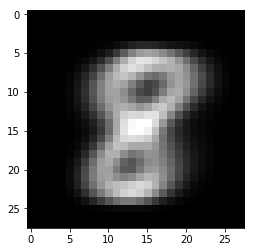

xp pc vector:  [735.34804401117685, 174.23649427801519]
Xptest result:  1.0


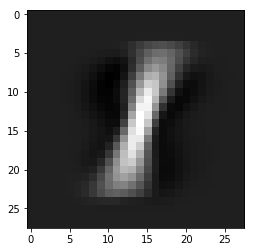

xn pc vector:  [-862.51112384767316, -280.2669936416745]
Xntest result:  1.0


In [24]:
xp = Xtest[10]
xp1t, xp2t, xpz = convertQuery(xp, mu, ev1, ev2)
xppopo = queryHistogram(xp1t, xp2t, HPosClassifier, Pc1Max, Pc2Max, Pc1Min, Pc2Min, 25)
xpnegneg = queryHistogram(xp1t, xp2t, HNegClassifier, Pc1Max, Pc2Max, Pc1Min, Pc2Min, 25)
xptestresult = xppopo / (xppopo + xpnegneg)

xpr = np.dot(np.matrix([xp1t, xp2t]), np.matrix(np.array([ev1, ev2])))
xprec = xpr + mu
plt.imshow(xprec.reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
print ("xp pc vector: ", [xp1t, xp2t])
print ("Xptest result: ", xptestresult)

xn = Xtest[0]
xn1t, xn2t, xnz = convertQuery(xn, mu, ev1, ev2)
xnpopo = queryHistogram(xn1t, xn2t, HPosClassifier, Pc1Max, Pc2Max, Pc1Min, Pc2Min, 25)
xnnegneg = queryHistogram(xn1t, xn2t, HNegClassifier, Pc1Max, Pc2Max, Pc1Min, Pc2Min, 25)
xntestresult = xnnegneg / (xnpopo + xnnegneg)
             
xnr = np.dot(np.matrix([xn1t, xn2t]), np.matrix(np.array([ev1, ev2])))
xnrec = xnr + mu
plt.imshow(xnrec.reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
print ("xn pc vector: ", [xn1t, xn2t])
print ("Xntest result: ", xntestresult)

In [25]:
bayesianProbXP = calculateBayesianProbability(positiveCovariance, negativeCovariance, np.matrix([xp1t, xp2t]), 
                             positiveMeanVector, negativeMeanVector, numPositiveSamples, numNegativeSamples)
print("bayesianProbXP: ", bayesianProbXP)
bayesianProbXNpositive = calculateBayesianProbability(positiveCovariance, negativeCovariance, np.matrix([xn1t, xn2t]), 
                             positiveMeanVector, negativeMeanVector, numPositiveSamples, numNegativeSamples)
print("bayesianProbXN: ", 1-bayesianProbXNpositive )

bayesianFatResults = list()
for q in Xtest :
    p111, p222, zzz = convertQuery(q, mu, ev1, ev2)
    popbaye = calculateBayesianProbability(positiveCovariance, negativeCovariance, np.matrix([p111, p222]), 
                             positiveMeanVector, negativeMeanVector, numPositiveSamples, numNegativeSamples)
    negbaye = 1-popbaye
    if(popbaye > negbaye) :
        bayesianFatResults.append(8)
    else :
        bayesianFatResults.append(1)

overallResultsBayesian = compareTestAndActual(bayesianFatResults, labelstest)
print ("Overall Results Bayesian: ", overallResultsBayesian)

bayesianProbXP:  [[ 0.9999987]]
bayesianProbXN:  [[ 0.99390277]]
Overall Results Bayesian:  0.9871977240398293


In [26]:
import pandas as pd
writer = pd.ExcelWriter("../DataFiles/Assignment3Outputs.xlsx")

meanVectorDF = pd.DataFrame(data=mu[0:])
meanVectorDF.to_excel(writer, 'mean vector')

firstEigenVectorDF = pd.DataFrame(data=V[0:1,:])
firstEigenVectorDF.to_excel(writer, 'first eigenvector')

secondEigenVectorDF = pd.DataFrame(data=V[1:2,:])
secondEigenVectorDF.to_excel(writer, 'second eigenvector')

positiveHistogramDF = pd.DataFrame(data=HPosClassifier[0:,0:])
negativeHistogramDF = pd.DataFrame(data=HNegClassifier[0:,0:])
positiveHistogramDF.to_excel(writer, 'positive histogram')
negativeHistogramDF.to_excel(writer, 'negative histogram')

xpDF = pd.DataFrame(data=xp[0:])
xnDF = pd.DataFrame(data=xn[0:])
xpDF.to_excel(writer, 'xp')
xnDF.to_excel(writer, 'xn')

xpzDF = pd.DataFrame(data=xpz[0:])
xnzDF = pd.DataFrame(data=xnz[0:])
xpzDF.to_excel(writer, 'xpz1')
xnzDF.to_excel(writer, 'xnz1')

xprDF = pd.DataFrame(data=xpr[0:])
xnrDF = pd.DataFrame(data=xnr[0:])
xprDF.to_excel(writer, 'xpr')
xnrDF.to_excel(writer, 'xnr')

xprecDF = pd.DataFrame(data=xprec[0:])
xnrecDF = pd.DataFrame(data=xnrec[0:])
xprecDF.to_excel(writer, 'xprec')
xnrecDF.to_excel(writer, 'xnrec')

